# SDGs Mapping for Land Sector Data

## Objective
To identify which Sustainable Development Goals (SDGs) align with land sector data, focusing on factors such as land use, environmental impact, and social implications.

## Introduction
The United Nations Sustainable Development Goals (SDGs) consist of 17 global goals designed as a "blueprint to achieve a better and more sustainable future for all" by 2030. The alignment of datasets with these goals helps in making informed decisions to address global challenges.
The 17 Sustainable Development Goals set by the United Nations, which are:

1. No Poverty
1. Zero Hunger
1. Good Health and Well-being
1. Quality Education
1. Gender Equality
1. Clean Water and Sanitation
1. Affordable and Clean Energy
1. Decent Work and Economic Growth
1. Industry, Innovation, and Infrastructure
1. Reduced Inequality
1. Sustainable Cities and Communities
1. Responsible Consumption and Production
1. Climate Action
1. Life Below Water
1. Life on Land
1. Peace and Justice Strong Institutions
1. Partnerships to achieve the Goal

## Methodology
The datasets were thoroughly reviewed, and each was mapped to specific SDGs based on its implications, impact, and the broader objectives of the SDGs.

In [49]:
import geopandas as gpd
import matplotlib.pyplot as plt


In [62]:
# Load the datasets
soil_gdf = gpd.read_file("World_Soil_Resources_wgs84.geojson")
climate_gdf = gpd.read_file("IPCC_ClimateZoneMap_Vector.geojson")
hotspot_gdf = gpd.read_file("CI_BiodiversityHotspots.geojson")

In [63]:
soil_gdf.head()

,SNAME,IPCC,geometry
0,AB,Albeluvisol,"MULTIPOLYGON (((31.77594 49.15567, 31.98717 49..."
1,AC,Acrisol,"MULTIPOLYGON (((116.05041 -2.90441, 116.04652 ..."
2,AN,Andosol,"MULTIPOLYGON (((-79.98444 -3.35085, -79.98917 ..."
3,AR,Arenosol,"MULTIPOLYGON (((60.36591 43.61313, 60.33553 43..."
4,AT,Anthrosol,"MULTIPOLYGON (((122.11467 30.15301, 121.90077 ..."


In [64]:
climate_gdf.head()

,CLASS_NAME,geometry
0,0,"MULTIPOLYGON (((-37.65000 83.50000, -37.65000 ..."
1,0,"MULTIPOLYGON (((-38.75000 83.40000, -38.75000 ..."
2,0,"MULTIPOLYGON (((-38.60000 83.40000, -38.60000 ..."
3,0,"MULTIPOLYGON (((-37.15000 83.40000, -37.15000 ..."
4,5,"MULTIPOLYGON (((-40.40000 83.40000, -40.40000 ..."


In [65]:
hotspot_gdf.head()  

,OBJECTID,NAME,Type,Shape_Length,Shape_Area,geometry
0,1,Chilean Winter Rainfall and Valdivian Forests,hotspot area,200.706891,40.754665,"MULTIPOLYGON (((-74.59792 -46.92502, -74.61111..."
1,2,Chilean Winter Rainfall and Valdivian Forests,outer limit,191.174978,186.085694,"POLYGON ((-70.30946 -22.96028, -70.48596 -22.7..."
2,3,Cape Floristic Region,hotspot area,93.790123,7.610383,"MULTIPOLYGON (((23.08672 -34.07310, 23.08538 -..."
3,4,Maputaland-Pondoland-Albany,hotspot area,49.631419,25.366584,"MULTIPOLYGON (((24.48767 -34.10045, 24.48800 -..."
4,5,New Caledonia,hotspot area,24.637100,1.646954,"MULTIPOLYGON (((167.46053 -22.71228, 167.46161..."


In [68]:
# Define the mapping functions for each dataset
def map_soil_to_sdg(row):
    if row["IPCC"] != '':  
        return "SDG 15: Life on Land"
    else:
        return "Not Mapped"

In [69]:
def map_to_sdg_climate(row):
    # All climate zones are relevant to climate action
    return "SDG 13: Climate Action"

In [70]:
def map_biodiversity_to_sdg(row):
    # List of known marine hotspots
    marine_hotspots = [
        'New Caledonia', 
        'Caribbean Islands', 
        'East Melanesian Islands', 
        'Polynesia-Micronesia', 
        'Coral Triangle',
        'Madagascar and the Indian Ocean Islands'  
    ]
    
    # Check if the hotspot is known for marine biodiversity
    if row['NAME'] in marine_hotspots:
        return "SDG 14: Life Below Water"
    else:
        return "SDG 15: Life on Land"


In [71]:
 # Apply the mapping functions
soil_gdf['SDG_Mapping'] = soil_gdf.apply(map_soil_to_sdg, axis=1)
climate_gdf['SDG_Mapping'] = climate_gdf.apply(map_to_sdg_climate, axis=1)
hotspot_gdf['SDG_Mapping'] = hotspot_gdf.apply(map_biodiversity_to_sdg, axis=1)


In [74]:
# Save the mapped dataset to a new file
soil_gdf.to_file("Mapped_World_Soil_Resources.geojson", driver='GeoJSON')
climate_gdf.to_file("Mapped_IPCC_ClimateZoneMap.geojson", driver='GeoJSON')
hotspot_gdf.to_file("CI_BiodiversityHotspots_Mapped.geojson", driver='GeoJSON')

In [72]:
soil_gdf.head()

,SNAME,IPCC,geometry,SDG_Mapping
0,AB,Albeluvisol,"MULTIPOLYGON (((31.77594 49.15567, 31.98717 49...",SDG 15: Life on Land
1,AC,Acrisol,"MULTIPOLYGON (((116.05041 -2.90441, 116.04652 ...",SDG 15: Life on Land
2,AN,Andosol,"MULTIPOLYGON (((-79.98444 -3.35085, -79.98917 ...",SDG 15: Life on Land
3,AR,Arenosol,"MULTIPOLYGON (((60.36591 43.61313, 60.33553 43...",SDG 15: Life on Land
4,AT,Anthrosol,"MULTIPOLYGON (((122.11467 30.15301, 121.90077 ...",SDG 15: Life on Land


In [73]:
climate_gdf.head()

,CLASS_NAME,geometry,SDG_Mapping
0,0,"MULTIPOLYGON (((-37.65000 83.50000, -37.65000 ...",SDG 13: Climate Action
1,0,"MULTIPOLYGON (((-38.75000 83.40000, -38.75000 ...",SDG 13: Climate Action
2,0,"MULTIPOLYGON (((-38.60000 83.40000, -38.60000 ...",SDG 13: Climate Action
3,0,"MULTIPOLYGON (((-37.15000 83.40000, -37.15000 ...",SDG 13: Climate Action
4,5,"MULTIPOLYGON (((-40.40000 83.40000, -40.40000 ...",SDG 13: Climate Action


In [59]:
hotspot_gdf.head()  


,OBJECTID,NAME,Type,Shape_Length,Shape_Area,geometry,SDG_Mapping
0,1,Chilean Winter Rainfall and Valdivian Forests,hotspot area,200.706891,40.754665,"MULTIPOLYGON (((-74.59792 -46.92502, -74.61111...",SDG 15: Life on Land
1,2,Chilean Winter Rainfall and Valdivian Forests,outer limit,191.174978,186.085694,"POLYGON ((-70.30946 -22.96028, -70.48596 -22.7...",SDG 15: Life on Land
2,3,Cape Floristic Region,hotspot area,93.790123,7.610383,"MULTIPOLYGON (((23.08672 -34.07310, 23.08538 -...",SDG 15: Life on Land
3,4,Maputaland-Pondoland-Albany,hotspot area,49.631419,25.366584,"MULTIPOLYGON (((24.48767 -34.10045, 24.48800 -...",SDG 15: Life on Land
4,5,New Caledonia,hotspot area,24.637100,1.646954,"MULTIPOLYGON (((167.46053 -22.71228, 167.46161...",SDG 14: Life Below Water


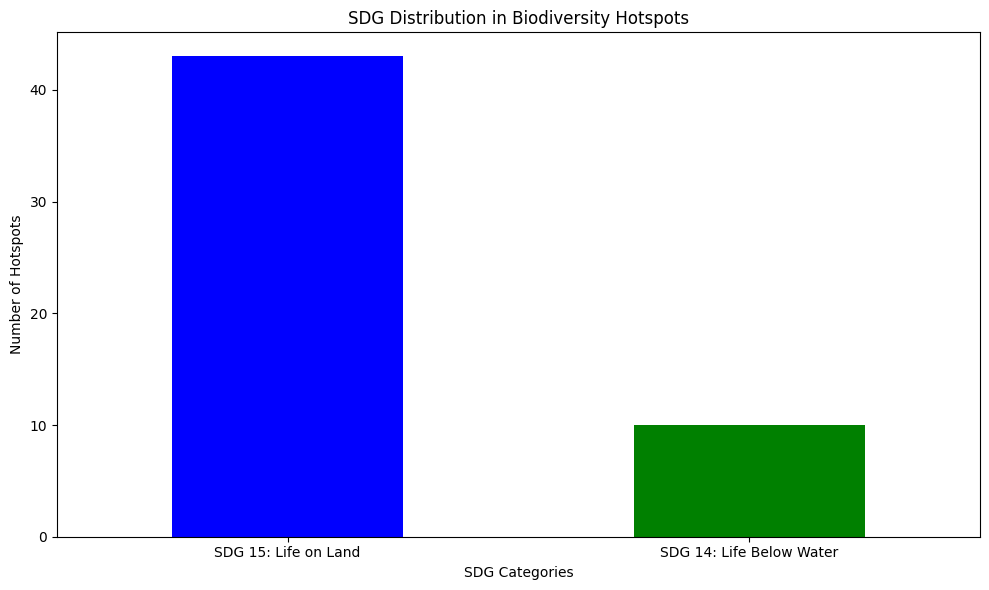

In [60]:
# Create a bar chart
sdg_counts = hotspot_gdf['SDG_Mapping'].value_counts()
plt.figure(figsize=(10, 6))
sdg_counts.plot(kind='bar', color=['blue', 'green'])
plt.title('SDG Distribution in Biodiversity Hotspots')
plt.xlabel('SDG Categories')
plt.ylabel('Number of Hotspots')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

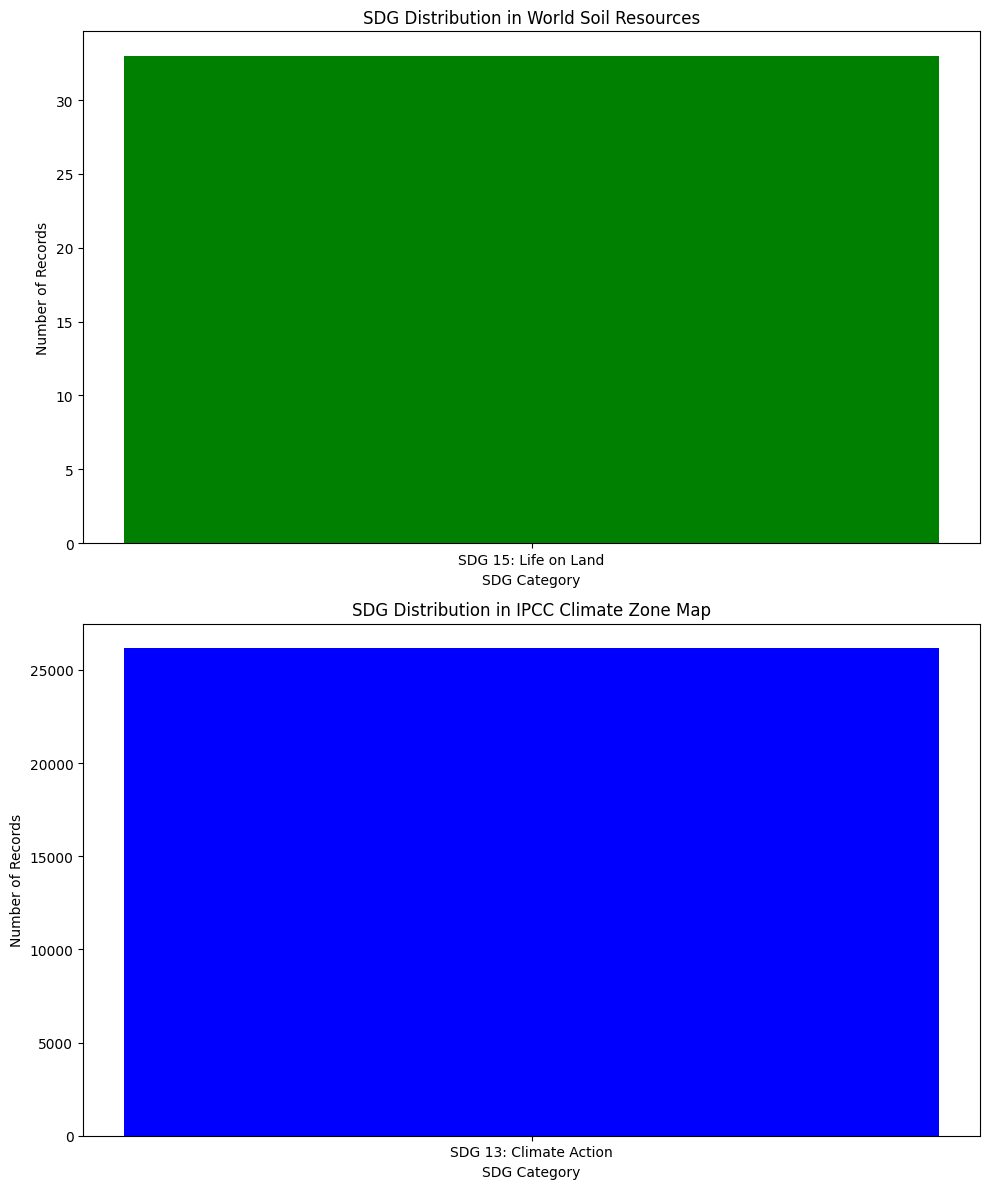

In [61]:
# Create bar charts
soil_counts = soil_gdf['SDG_Mapping'].value_counts()
climate_counts = climate_gdf['SDG_Mapping'].value_counts()

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Soil Resources bar chart
axs[0].bar(soil_counts.index, soil_counts.values, color='green')
axs[0].set_title('SDG Distribution in World Soil Resources')
axs[0].set_xlabel('SDG Category')
axs[0].set_ylabel('Number of Records')
axs[0].set_xticks(soil_counts.index)
axs[0].set_xticklabels(soil_counts.index, rotation=0)

# Climate Zone Map bar chart
axs[1].bar(climate_counts.index, climate_counts.values, color='blue')
axs[1].set_title('SDG Distribution in IPCC Climate Zone Map')
axs[1].set_xlabel('SDG Category')
axs[1].set_ylabel('Number of Records')
axs[1].set_xticks(climate_counts.index)
axs[1].set_xticklabels(climate_counts.index, rotation=0)

plt.tight_layout()
plt.show()
